# U.S. Medical Insurance Costs

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import iqr
import seaborn as sns

insurance_data = pd.read_csv("insurance.csv")
print(insurance_data.head(),"\n")

# Average age of all patients:
avg_age = insurance_data.age.mean()
print("AVERAGE AGE:...........................")
print("The average age of all patients in this insurance dataset is {}.\n".format(round(avg_age)))

# Number of patients in each region:
reg_patients = insurance_data.region.value_counts().reset_index()
reg_patients = reg_patients.rename(columns={"index":"region", "region":"No of Patients"})
print("NUMBER OF PATIENTS IN EACH REGION................................")
print(reg_patients,"\n")

#plt.hist(insurance_data.region)
#plt.show()

# Region with the maximum number of patients:
reg_patients = reg_patients.rename(columns={"No of Patients":"value"})
max_region_num = reg_patients.value.max()
max_region = reg_patients.region[reg_patients.value == max_region_num].iloc[0]
print("The " + max_region + " region has the maximum number of patients")

# Region with the minimum number of patients:
min_region_num = reg_patients.value.min()
min_region = reg_patients.region[reg_patients.value == min_region_num].iloc[0]
print("The " + min_region + " region has the minimum number of patients\n")

# Number of male and female patients in each region:
print("NUMBER OF MALE AND FEMALE PATIENTS IN EACH REGION................................")  
reg_sex = insurance_data.groupby(["region", "sex"]).age.count().reset_index()
reg_sex = reg_sex.pivot(index="region", columns="sex", values="age")
print(reg_sex,"\n")

# Number of smoker and non-smoker patients in each region:
print("NUMBER OF SMOKER AND NON-SMOKER PATIENTS IN EACH REGION................................")  
reg_smoker = insurance_data.groupby(["region", "smoker"]).age.count().reset_index()
reg_smoker = reg_smoker.pivot(index="region", columns="smoker", values="age")
reg_smoker = reg_smoker.rename(columns={"no":"Non-smoker", "yes":"Smoker"})
print(reg_smoker,"\n")


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

AVERAGE AGE:...........................
The average age of all patients in this insurance dataset is 39.

NUMBER OF PATIENTS IN EACH REGION................................
      region  No of Patients
0  southeast             364
1  southwest             325
2  northwest             325
3  northeast             324 

The southeast region has the maximum number of patients
The northeast region has the minimum number of patients

NUMBER OF MALE AND FEMALE PATIENTS IN EACH REGION................................
sex        female  male
region                 
northeast     161   163
northwest     164   161
sout

## SUMMARY STATISTICS ON DATA

IQR 11899.625365


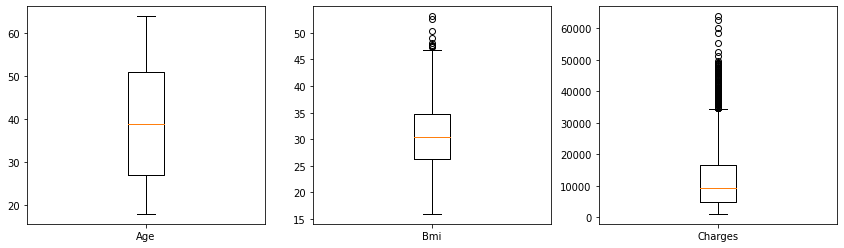

Proportion of patients in each region.........................................
southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64


In [7]:
# Investigating the spread of the age, bmi, and charges columns:
interquartile_range = iqr(insurance_data.charges)
print('IQR', interquartile_range)
ax1 = plt.subplot(1,3,1)
plt.subplots_adjust(right=2)
plt.boxplot(insurance_data.age)
ax1.set_xticklabels(['Age'])

ax2 = plt.subplot(1,3,2)
plt.boxplot(insurance_data.bmi)
ax2.set_xticklabels(['Bmi'])

ax3 = plt.subplot(1,3,3)
plt.boxplot(insurance_data.charges)
ax3.set_xticklabels(['Charges'])
plt.show()

# Finding the percentage of patients in each region:
percent_region = insurance_data.region.value_counts(normalize=True)
print('Proportion of patients in each region.........................................')
print(percent_region)

## VISUALIZING THE DATA

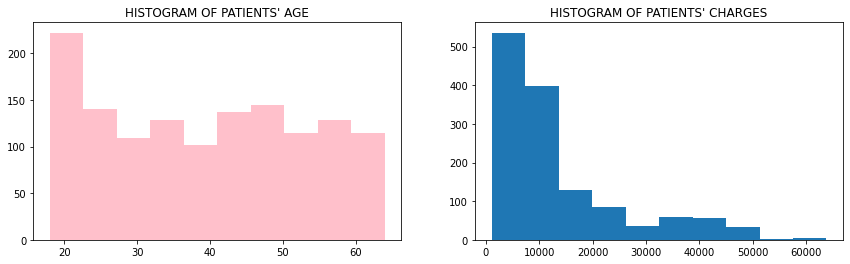

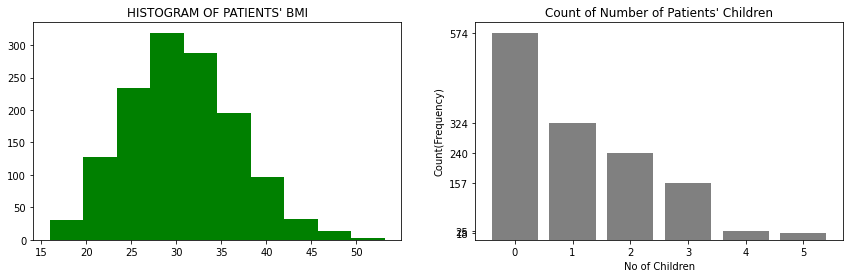

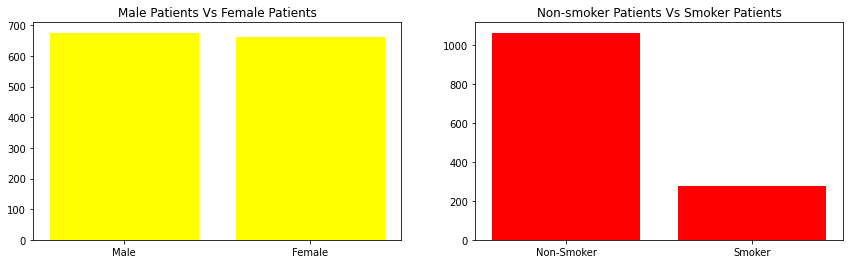

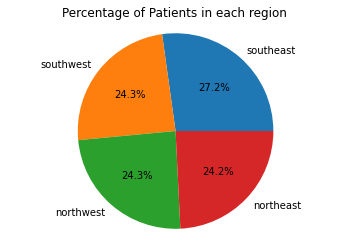

In [8]:
# Visualizing the the amount of patients in each region:
# plt.clf()
# sns.countplot(insurance_data.region)
# plt.show()

# Visualizing the age and charges column using histogram:
plt.subplot(1,2,1)
plt.hist(insurance_data.age, range=(18, 64), bins=10, color='pink')
plt.title("HISTOGRAM OF PATIENTS' AGE")
plt.subplots_adjust(right=2)

plt.subplot(1,2,2)
plt.hist(insurance_data.charges)
plt.title("HISTOGRAM OF PATIENTS' CHARGES")
plt.show()
print()

# Visualizing the bmi and children column using histogram:
plt.clf()
plt.subplot(1,2,1)
plt.hist(insurance_data.bmi, color='green')
plt.title("HISTOGRAM OF PATIENTS' BMI")
plt.subplots_adjust(right=2)

plt.subplot(1,2,2)
df3 = insurance_data.children.value_counts().reset_index()
y_values = [i for i in df3.children]
ax3 = plt.subplot(1,2,2)
ax3.set_xticks(range(6))
ax3.set_yticks(y_values)
plt.bar(range(6), df3.children, color='gray')
plt.title("Count of Number of Patients' Children")
plt.xlabel('No of Children')
plt.ylabel("Count(Frequency)")
plt.show()
print()

# Visualizing sex and smokers colunm:
df1 = insurance_data.sex.value_counts().reset_index()
sex = ['Male', 'Female']
plt.clf()
ax = plt.subplot(1,2,1)
ax.set_xticks(range(len(sex)))
ax.set_xticklabels(sex)
plt.bar(range(len(sex)), df1.sex, color='yellow')
plt.title('Male Patients Vs Female Patients')
plt.subplots_adjust(right=2)

df2 = insurance_data.smoker.value_counts().reset_index()
smoker = ['Non-Smoker', 'Smoker']
ax1 = plt.subplot(1,2,2)
ax1.set_xticks(range(len(smoker)))
ax1.set_xticklabels(smoker)
plt.bar(range(len(smoker)), df2.smoker, color='red')
plt.title('Non-smoker Patients Vs Smoker Patients')
plt.show()
print()

# Visualizing the region column:
plt.clf()
df4 = insurance_data.region.value_counts().reset_index()
df4 = df4.rename(columns={'index':'name'})
region = [name for name in df4.name]
plt.pie(df4.region, labels=region, autopct='%0.1f%%')
plt.axis('equal')
plt.title('Percentage of Patients in each region')
plt.show()

## INSPECTING ASSOCIATION BETWEEN VARIABLES

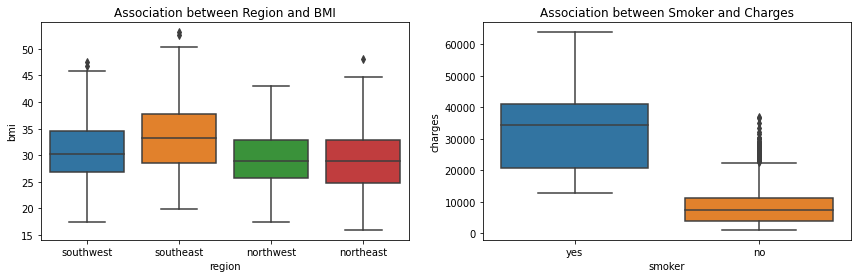

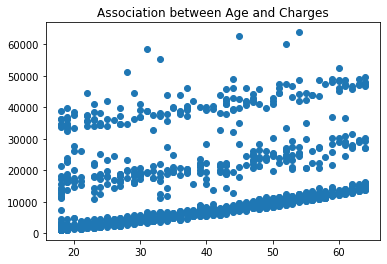


Association between Sex and Smoker.............................
smoker   no  yes
sex             
female  547  115
male    517  159 



In [9]:
from scipy.stats import chi2_contingency

# Checking for association between region and bmi:
plt.clf()
plt.subplot(1,2,1)
sns.boxplot(data=insurance_data, x=insurance_data.region, y=insurance_data.bmi)
plt.title('Association between Region and BMI')
plt.subplots_adjust(right=2)

# Checking for association between smoker and charges:
plt.subplot(1,2,2)
sns.boxplot(data=insurance_data, x=insurance_data.smoker, y=insurance_data.charges)
plt.title('Association between Smoker and Charges')
plt.show()

# Checking for association between age and charges:
plt.clf()
plt.scatter(x=insurance_data.age, y=insurance_data.charges)
plt.title('Association between Age and Charges')
plt.show()
print()

# Checking for association between sex and smoker:
print('Association between Sex and Smoker.............................')
sex_smoker_freq = pd.crosstab(insurance_data.sex, insurance_data.smoker)
print(sex_smoker_freq,"\n")